# Importando Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from statsmodels.stats.weightstats import DescrStatsW
from scipy.stats import norm
from PIL import Image
from scipy.stats import normaltest
from scipy.stats import wilcoxon

In [ ]:
dados_thingspeak = pd.read_csv('dados_thingspeak.csv')
dados_metar = pd.read_csv('dados_metar.csv', sep=";")

# Ajustando dataset do Metar

*   Overview dos dados
*   Casting para tipos de dados corretos
*   Arredondando números em ponto flutuante






In [ ]:
dados_metar.head()

,Data_Hora,Temp,Pressão,Umidade,Dir Vento,Vel Vento
0,09/07/2020 13:00,30,1014,69.98,80,12
1,09/07/2020 14:00,30,1014,69.98,90,13
2,09/07/2020 15:00,30,1014,78.82,70,9
3,09/07/2020 16:00,30,1014,74.19,60,7
4,09/07/2020 17:00,30,1014,74.19,80,9


In [ ]:
dados_metar.info()

NameError: ignored

In [ ]:
dados_metar['Data_Hora'] = pd.to_datetime(dados_metar['Data_Hora'])

In [ ]:
dados_metar = dados_metar.round(decimals=0)

In [ ]:
dados_metar['Umidade'] = dados_metar['Umidade'].astype(int)

In [ ]:
dados_metar.head()

# Tratamento dos Dados da Plataforma Thingspeak


*   Overview dos dados
*   Removendo Colunas desnecessárias
*   Renomeando colunas 
*   Casting de dados
*   Agrupando valores por data e hora





In [ ]:
dados_thingspeak.head()

,created_at,entry_id,field1,field2,field3,field4,field5,latitude,longitude,elevation,status
0,2020-07-07 10:18:42 -03,1,26.55,1013.96,86.5,0.0,315.0,NaN,NaN,NaN,NaN
1,2020-07-07 10:19:13 -03,2,26.59,1013.91,86.6,0.0,135.0,NaN,NaN,NaN,NaN
2,2020-07-07 10:19:45 -03,3,26.67,1013.91,86.7,0.0,135.0,NaN,NaN,NaN,NaN
3,2020-07-07 10:20:16 -03,4,26.76,1013.96,87.1,0.0,90.0,NaN,NaN,NaN,NaN
4,2020-07-07 10:20:48 -03,5,26.79,1013.88,86.7,0.0,135.0,NaN,NaN,NaN,NaN


In [ ]:
dados_thingspeak.drop(columns=['entry_id','latitude','longitude','elevation','status'],inplace=True)

In [ ]:
dados_thingspeak.rename(columns={'field1':'temperatura','field2':'pressao','field3':'umidade','field4':'vel_vento','field5':'dir_vento'}, inplace=True)

In [ ]:
dados_thingspeak.head()

,created_at,temperatura,pressao,umidade,vel_vento,dir_vento
0,2020-07-07 10:18:42 -03,26.55,1013.96,86.5,0.0,315.0
1,2020-07-07 10:19:13 -03,26.59,1013.91,86.6,0.0,135.0
2,2020-07-07 10:19:45 -03,26.67,1013.91,86.7,0.0,135.0
3,2020-07-07 10:20:16 -03,26.76,1013.96,87.1,0.0,90.0
4,2020-07-07 10:20:48 -03,26.79,1013.88,86.7,0.0,135.0


## Removendo a informação do Fuso horário na coluna created_at

In [ ]:
dados_thingspeak['created_at'] = dados_thingspeak['created_at'].map(lambda x: x.rstrip('-03'))

In [ ]:
dados_thingspeak.head()

,created_at,temperatura,pressao,umidade,vel_vento,dir_vento
0,2020-07-07 10:18:42,26.55,1013.96,86.5,0.0,315.0
1,2020-07-07 10:19:13,26.59,1013.91,86.6,0.0,135.0
2,2020-07-07 10:19:45,26.67,1013.91,86.7,0.0,135.0
3,2020-07-07 10:20:16,26.76,1013.96,87.1,0.0,90.0
4,2020-07-07 10:20:48,26.79,1013.88,86.7,0.0,135.0


## Convertendo coluna created_at para o tipo datetime

In [ ]:
dados_thingspeak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   13516 non-null  object 
 1   temperatura  13174 non-null  float64
 2   pressao      13174 non-null  float64
 3   umidade      13174 non-null  float64
 4   vel_vento    13173 non-null  float64
 5   dir_vento    13171 non-null  float64
dtypes: float64(5), object(1)
memory usage: 633.7+ KB


In [ ]:
dados_thingspeak['created_at'] = pd.to_datetime(dados_thingspeak['created_at'])

In [ ]:
dados_thingspeak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   created_at   13516 non-null  datetime64[ns]
 1   temperatura  13174 non-null  float64       
 2   pressao      13174 non-null  float64       
 3   umidade      13174 non-null  float64       
 4   vel_vento    13173 non-null  float64       
 5   dir_vento    13171 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 633.7 KB


## Selecionando apenas os período da amostra

In [ ]:
amostra_prototipo = dados_thingspeak.query('created_at >= "2020-07-09 13:00"')

In [ ]:
amostra_prototipo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10157 entries, 3359 to 13515
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   created_at   10157 non-null  datetime64[ns]
 1   temperatura  10157 non-null  float64       
 2   pressao      10157 non-null  float64       
 3   umidade      10157 non-null  float64       
 4   vel_vento    10156 non-null  float64       
 5   dir_vento    10156 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 555.5 KB


In [ ]:
amostra_prototipo = amostra_prototipo.round(decimals=0)

## Arredondando valores da amostra e removendo valores nulos

In [ ]:
amostra_prototipo['temperatura'] = amostra_prototipo['temperatura'].astype(int)
amostra_prototipo['pressao'] = amostra_prototipo['pressao'].astype(int)
amostra_prototipo['umidade'] = amostra_prototipo['umidade'].astype(int)
amostra_prototipo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10157 entries, 3359 to 13515
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   created_at   10157 non-null  datetime64[ns]
 1   temperatura  10157 non-null  int64         
 2   pressao      10157 non-null  int64         
 3   umidade      10157 non-null  int64         
 4   vel_vento    10156 non-null  float64       
 5   dir_vento    10156 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 555.5 KB


In [ ]:
amostra_prototipo.isnull().sum()
amostra_prototipo['vel_vento'].fillna(amostra_prototipo['vel_vento'].mean(), inplace=True)
amostra_prototipo['dir_vento'].fillna(amostra_prototipo['dir_vento'].median(), inplace=True)

In [ ]:
amostra_prototipo['vel_vento'] = amostra_prototipo['vel_vento'].astype(int)
amostra_prototipo['dir_vento'] = amostra_prototipo['dir_vento'].astype(int)
amostra_prototipo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10157 entries, 3359 to 13515
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   created_at   10157 non-null  datetime64[ns]
 1   temperatura  10157 non-null  int64         
 2   pressao      10157 non-null  int64         
 3   umidade      10157 non-null  int64         
 4   vel_vento    10157 non-null  int64         
 5   dir_vento    10157 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 555.5 KB


In [ ]:
amostra_prototipo['created_at'].dt.day


3359      9
3360      9
3361      9
3362      9
3363      9
         ..
13511    13
13512    13
13513    13
13514    13
13515    13
Name: created_at, Length: 10157, dtype: int64

In [ ]:
amostra_prototipo['Dias'] = pd.to_datetime(amostra_prototipo['created_at']).dt.date
amostra_prototipo['hora'] = pd.to_datetime(amostra_prototipo['created_at']).dt.time
amostra_prototipo

,created_at,temperatura,pressao,umidade,vel_vento,dir_vento,Dias,hora
3359,2020-07-09 13:00:21,30,1014,79,0,90,2020-07-09,13:00:21
3360,2020-07-09 13:00:52,30,1014,78,0,90,2020-07-09,13:00:52
3361,2020-07-09 13:01:23,30,1014,78,0,90,2020-07-09,13:01:23
3362,2020-07-09 13:01:55,30,1014,78,0,90,2020-07-09,13:01:55
3363,2020-07-09 13:02:26,30,1014,77,0,90,2020-07-09,13:02:26
...,...,...,...,...,...,...,...,...
13511,2020-07-13 06:40:54,27,1014,74,0,45,2020-07-13,06:40:54
13512,2020-07-13 06:41:26,27,1014,74,0,45,2020-07-13,06:41:26
13513,2020-07-13 06:41:57,27,1014,74,0,90,2020-07-13,06:41:57
13514,2020-07-13 06:42:28,27,1014,75,0,90,2020-07-13,06:42:28


In [ ]:
amostra_hora = amostra_prototipo.resample('H', on='created_at').mean()

In [ ]:
amostra_hora

,temperatura,pressao,umidade,vel_vento,dir_vento
created_at,,,,,
2020-07-09 13:00:00,30.000000,1013.105263,77.719298,0.026316,103.815789
2020-07-09 14:00:00,30.000000,1013.000000,78.930435,0.034783,98.217391
2020-07-09 15:00:00,30.000000,1013.095652,80.269565,0.000000,104.478261
2020-07-09 16:00:00,30.000000,1013.826087,80.486957,0.000000,99.000000
2020-07-09 17:00:00,29.311475,1013.475410,79.229508,0.000000,109.918033
...,...,...,...,...,...
2020-07-13 02:00:00,28.000000,1012.095652,74.130435,0.304348,114.652174
2020-07-13 03:00:00,27.947826,1012.191304,77.008696,0.000000,141.260870
2020-07-13 04:00:00,27.000000,1012.991304,79.139130,0.008696,146.347826


# Analisando Variável temperatura

## Formando o Dataset de temperatura

In [ ]:
temperatura = dados_metar[['Data_Hora','Temp']]

In [ ]:
temperatura.rename(mapper = {'Temp':'Temperatura_REDEMET'},axis=1)



,Data_Hora,Temperatura_REDEMET
0,09/07/2020 13:00,30
1,09/07/2020 14:00,30
2,09/07/2020 15:00,30
3,09/07/2020 16:00,30
4,09/07/2020 17:00,30
...,...,...
85,13/07/2020 02:00,26
86,13/07/2020 03:00,25
87,13/07/2020 04:00,24
88,13/07/2020 05:00,24


In [ ]:
amostra_hora['temperatura'] = amostra_hora['temperatura'].astype(int)
amostra_hora['pressao'] = amostra_hora['pressao'].astype(int)
amostra_hora['umidade'] = amostra_hora['umidade'].astype(int)
amostra_hora['vel_vento'] = amostra_hora['vel_vento'].astype(int)
amostra_hora['dir_vento'] = amostra_hora['dir_vento'].astype(int)

In [ ]:
temperatura.columns
temperatura.rename(columns= {'Temp':'Temperatura_REDEMET', 'Temp_prototipo':'Temperatura_Prototipo'},inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
temperatura['Temperatura_Prototipo'] = amostra_hora['temperatura']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(0,amostra_hora.shape[0]):
    temperatura['Temperatura_Prototipo'][i] = amostra_hora['temperatura'][i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
temperatura.head()

,Data_Hora,Temperatura_REDEMET,Temperatura_Prototipo
0,09/07/2020 13:00,30,30.0
1,09/07/2020 14:00,30,30.0
2,09/07/2020 15:00,30,30.0
3,09/07/2020 16:00,30,30.0
4,09/07/2020 17:00,30,29.0


## Gráfico Boxplot

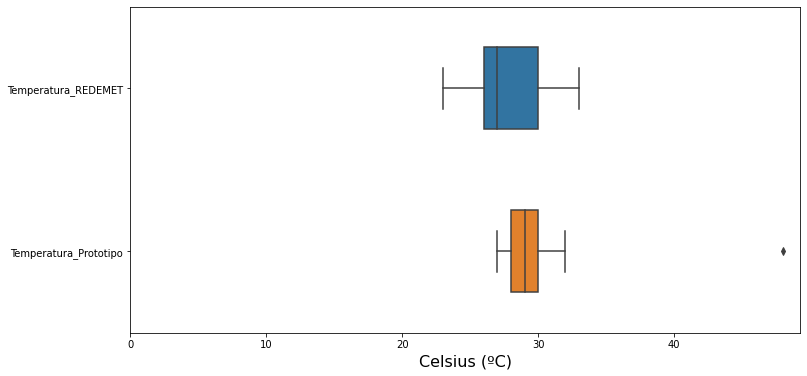

In [ ]:
ax = sns.boxplot(data = temperatura[['Temperatura_REDEMET','Temperatura_Prototipo']], orient = 'h',width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Celsius (ºC)', fontsize = 16)
ax.axis(xmin = 0)
ax.get_figure().savefig('box_plot.png')



## Gráfico Distribuição

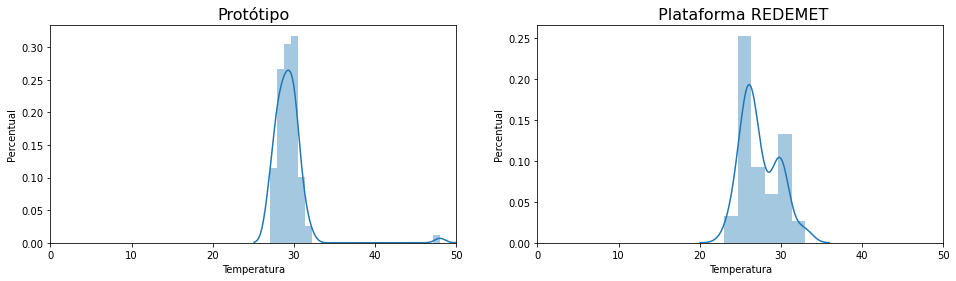

In [ ]:
f = plt.figure(figsize=(16, 4))
gs = f.add_gridspec(1, 2)


ax = f.add_subplot(gs[0, 0])
ax = sns.distplot(temperatura['Temperatura_Prototipo'])
ax.set_title('Protótipo',fontsize = 16)
ax.set_ylabel('Percentual')
ax.set_xlabel('Temperatura')
ax.axis(xmin=0,xmax=50)


ax1 = f.add_subplot(gs[0, 1])
ax1 = sns.distplot(temperatura['Temperatura_REDEMET'])
ax1.set_title(' Plataforma REDEMET',fontsize = 16)
ax1.set_ylabel('Percentual')
ax1.set_xlabel('Temperatura')
ax1.axis(xmin=0,xmax=50)


f.savefig("dist_temp.png")

In [ ]:
significancia = 0.05

In [ ]:
stats_teste, p_valor = normaltest(temperatura['Temperatura_REDEMET'])
print(stats_teste)
print(p_valor.round(2))

6.017605948106203
0.05


In [ ]:
stats_teste, p_valor = normaltest(temperatura['Temperatura_Prototipo'])
print(stats_teste)
print(p_valor.round(2))

146.08991626476922
0.0


In [ ]:
temperatura.describe()

,Temperatura_REDEMET,Temperatura_Prototipo
count,90.000000,90.000000
mean,27.377778,29.300000
std,2.276296,2.334163
min,23.000000,27.000000
25%,26.000000,28.000000
50%,27.000000,29.000000
75%,30.000000,30.000000
max,33.000000,48.000000


In [ ]:
T, p_valor = wilcoxon(temperatura['Temperatura_Prototipo'],temperatura['Temperatura_REDEMET'])
print(T)
print(p_valor)

280.5
4.440931370706263e-11


In [ ]:
T, p_valor = wilcoxon(temperatura['Temperatura_REDEMET'],temperatura['Temperatura_Prototipo'])
print(T)
print(p_valor.round(11))

280.5
4e-11


In [ ]:
if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


# Analisando Variável Pressão

## Formando dataset de pressão

In [ ]:
pressao = dados_metar[['Data_Hora','Pressão']]

In [ ]:
pressao.rename(mapper = {'Pressão':'P_REDEMET'},axis=1,inplace = True)

In [ ]:
pressao['P_Prototipo'] = amostra_hora['pressao']

In [ ]:
for i in range(0,amostra_hora.shape[0]):
    pressao['P_Prototipo'][i] = amostra_hora['pressao'][i]


In [ ]:
pressao.head()



,Data_Hora,P_REDEMET,P_Prototipo
0,2020-09-07 13:00:00,1014,1013.0
1,2020-09-07 14:00:00,1014,1013.0
2,2020-09-07 15:00:00,1014,1013.0
3,2020-09-07 16:00:00,1014,1013.0
4,2020-09-07 17:00:00,1014,1013.0


## Gráfico de Distribuição

In [ ]:
f = plt.figure(figsize=(16, 4))
gs = f.add_gridspec(1, 2)


ax = f.add_subplot(gs[0, 0])
ax = sns.distplot(pressao['P_Prototipo'])
ax.set_title('Protótipo',fontsize = 16)
ax.set_xlabel('Pressão')
ax.axis(xmin=1000,xmax=1020)

ax1 = f.add_subplot(gs[0, 1])
ax1 = sns.distplot(pressao['P_REDEMET'])
ax1.set_title(' Plataforma REDEMET',fontsize = 16)
ax1.set_xlabel('Pressão')
ax1.axis(xmin=1000,xmax=1020)


f.savefig('dist_pressao.png')


## Gráfico Box Plot


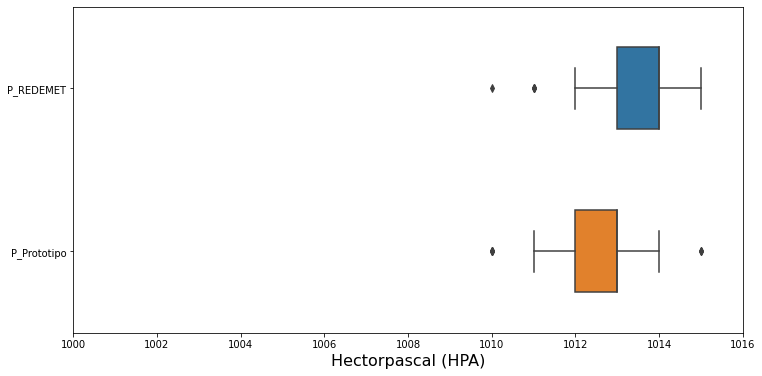

In [ ]:
ax = sns.boxplot(data = pressao[['P_REDEMET','P_Prototipo']], orient = 'h',width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Hectorpascal (HPA)', fontsize = 16)
ax.axis(xmin = 1000)
ax.get_figure().savefig('box_plot_presao.png')

## Estatisticas Descritivas

In [ ]:
pressao.describe()

,P_REDEMET,P_Prototipo
count,90.000000,90.000000
mean,1013.444444,1012.433333
std,1.112858,2.208513
min,1010.000000,995.000000
25%,1013.000000,1012.000000
50%,1014.000000,1013.000000
75%,1014.000000,1013.000000
max,1015.000000,1015.000000


## Teste de Normalidade

In [ ]:
stats_teste, p_valor = normaltest(pressao['P_Prototipo'])
print(stats_teste)
print(p_valor.round(2))

142.30883713925857
0.0


In [ ]:
stats_teste, p_valor = normaltest(pressao['P_REDEMET'])
print(stats_teste)
print(p_valor.round(2))

5.790792907657219
0.06


## Teste de Wilcoxon

In [ ]:
T, p_valor = wilcoxon(pressao['P_Prototipo'],pressao['P_REDEMET'])
print(T)
print(p_valor)

0.0
1.726032904017914e-14


In [ ]:
if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


# Analisando Variável Umidade

## Formando o Dataset

In [ ]:
umidade = dados_metar[['Data_Hora','Umidade']]

In [ ]:
umidade.rename(mapper = {'Umidade':'U_REDEMET'},axis=1,inplace = True)

In [ ]:
umidade['U_Prototipo'] = amostra_hora['umidade']

In [ ]:
for i in range(0,amostra_hora.shape[0]):
    umidade['U_Prototipo'][i] = amostra_hora['umidade'][i]

In [ ]:
umidade.head()

,Data_Hora,U_REDEMET,U_Prototipo
0,2020-09-07 13:00:00,70,77.0
1,2020-09-07 14:00:00,70,78.0
2,2020-09-07 15:00:00,79,80.0
3,2020-09-07 16:00:00,74,80.0
4,2020-09-07 17:00:00,74,79.0


## Gráfico de distribuição

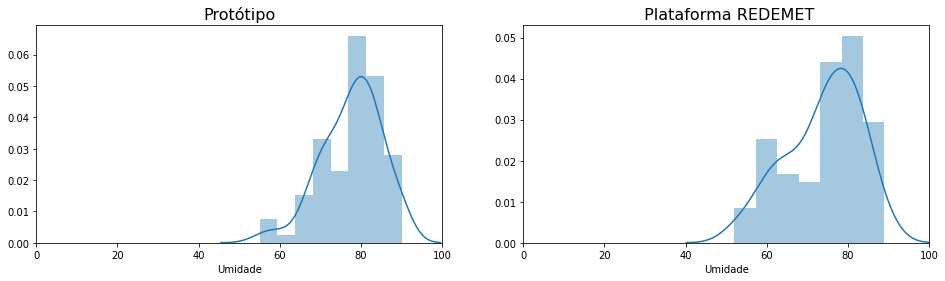

In [ ]:
f = plt.figure(figsize=(16, 4))
gs = f.add_gridspec(1, 2)


ax = f.add_subplot(gs[0, 0])
ax = sns.distplot(umidade['U_Prototipo'])
ax.set_title('Protótipo',fontsize = 16)
ax.set_xlabel('Umidade')
ax.axis(xmin=0,xmax=100)

ax1 = f.add_subplot(gs[0, 1])
ax1 = sns.distplot(umidade['U_REDEMET'])
ax1.set_title(' Plataforma REDEMET',fontsize = 16)
ax1.set_xlabel('Umidade')
ax1.axis(xmin=0,xmax=100)


f.savefig('dist_umidade.png')

## Gráfico BoxPlot

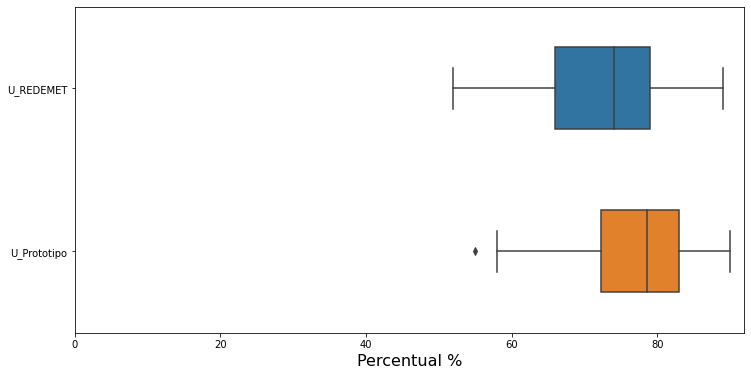

In [ ]:
ax = sns.boxplot(data = umidade[['U_REDEMET','U_Prototipo']], orient = 'h',width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Percentual %', fontsize = 16)
ax.axis(xmin = 0)
ax.get_figure().savefig('box_plot_umidade.png')

## Estatísticas Descritivas

In [ ]:
umidade.describe()

,U_REDEMET,U_Prototipo
count,90.000000,90.000000
mean,73.844444,77.677778
std,9.160137,7.401530
min,52.000000,55.000000
25%,66.000000,72.250000
50%,74.000000,78.500000
75%,79.000000,83.000000
max,89.000000,90.000000


## Teste de Normalidade

In [ ]:
stats_teste, p_valor = normaltest(umidade['U_Prototipo'])
print(stats_teste)
print(p_valor.round(2))

6.578816500594281
0.04


In [ ]:
stats_teste, p_valor = normaltest(umidade['U_REDEMET'])
print(stats_teste)
print(p_valor.round(2))

5.580508685672035
0.06


## Teste de Wilcoxon

In [ ]:
T, p_valor = wilcoxon(umidade['U_Prototipo'],umidade['U_REDEMET'])
print(T)
print(p_valor)

250.5
2.945317985626645e-11


In [ ]:
if(p_valor <= significancia):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


# Analisando Varíavel Direção do Vento

## Formando Dataset para análise 

In [ ]:
dir_vento = dados_metar[['Data_Hora','Dir Vento']]

In [ ]:
dir_vento.rename(mapper = {'Dir Vento':'DV_REDEMET'},axis=1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dir_vento['DV_Prototipo'] = amostra_hora['dir_vento']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in range(0,amostra_hora.shape[0]):
    dir_vento['DV_Prototipo'][i] = amostra_hora['dir_vento'][i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dir_vento['DV_Prototipo'] = dir_vento['DV_Prototipo'].round(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dir_vento.head()

,Data_Hora,DV_REDEMET,DV_Prototipo
0,09/07/2020 13:00,80,103.0
1,09/07/2020 14:00,90,98.0
2,09/07/2020 15:00,70,104.0
3,09/07/2020 16:00,60,99.0
4,09/07/2020 17:00,80,109.0


## Gráfico de distribuição

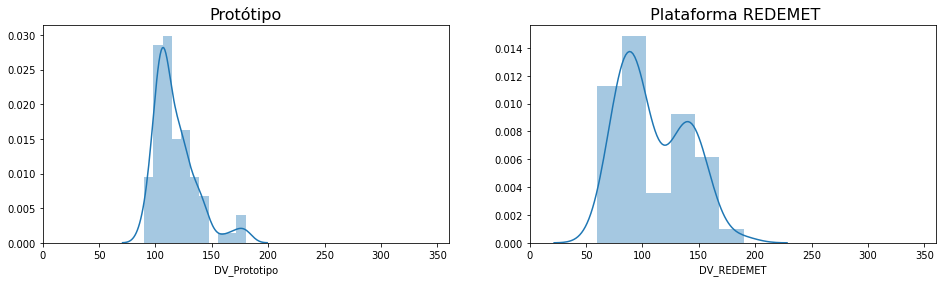

In [ ]:
f = plt.figure(figsize=(16, 4))
gs = f.add_gridspec(1, 2)


ax = f.add_subplot(gs[0, 0])
ax = sns.distplot(dir_vento['DV_Prototipo'])
ax.set_title('Protótipo',fontsize = 16)
ax.axis(xmin=0,xmax=360)

ax1 = f.add_subplot(gs[0, 1])
ax1 = sns.distplot(dir_vento['DV_REDEMET'])
ax1.set_title(' Plataforma REDEMET',fontsize = 16)
ax1.axis(xmin=0,xmax=360)

f.savefig('dist_dirvento.png')

## Gráfico Box Plot

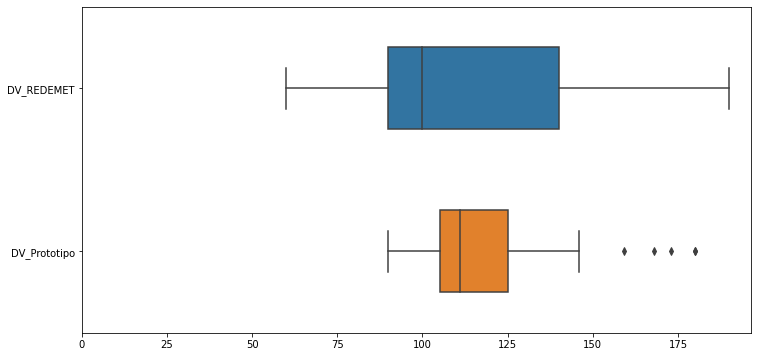

In [ ]:
ax = sns.boxplot(data = dir_vento[['DV_REDEMET','DV_Prototipo']], orient = 'h',width=0.5)
ax.figure.set_size_inches(12,6)
ax.axis(xmin = 0)
ax.get_figure().savefig('box_plot_dirvento.png')

## Estatísticas Descritivas

In [ ]:
dir_vento.describe()

,DV_REDEMET,DV_Prototipo
count,90.000000,90.000000
mean,109.666667,117.244444
std,29.659112,18.826416
min,60.000000,90.000000
25%,90.000000,105.000000
50%,100.000000,111.000000
75%,140.000000,125.000000
max,190.000000,180.000000


## Teste de Normalidade


In [ ]:
dir_vento.corr()

,DV_REDEMET,DV_Prototipo
DV_REDEMET,1.0000,0.5271
DV_Prototipo,0.5271,1.0000


In [ ]:
t,p_valor = normaltest(dir_vento['DV_Prototipo'])
print(T)
print(p_valor)

if(p_valor <= significancia):
    print('Não é Normal')
else:
    print('É Normal')

250.5
3.1051148404780604e-07
Não é Normal


In [ ]:
t,p_valor = normaltest(dir_vento['DV_REDEMET'])
print(T)
print(p_valor)

if(p_valor <= significancia):
    print('Não é Normal')
else:
    print('É Normal')

250.5
0.004149602418006602
Não é Normal


## Teste de Wilcoxon

In [ ]:
T,p_valor = wilcoxon(dir_vento['DV_Prototipo'],dir_vento['DV_REDEMET'])
print(T)
print(p_valor)

if(p_valor <= significancia):
  print('Rejeita H0')
else:
  print('Ajeita H0')

1213.5
0.0007901324680919929
Rejeita H0


# Análise da Velocidade do Vento

In [ ]:
vel_vento = dados_metar[['Data_Hora','Vel Vento']]

In [ ]:
amostra_hora['vel_vento']

created_at
2020-07-09 13:00:00    0
2020-07-09 14:00:00    0
2020-07-09 15:00:00    0
2020-07-09 16:00:00    0
2020-07-09 17:00:00    0
                      ..
2020-07-13 02:00:00    0
2020-07-13 03:00:00    0
2020-07-13 04:00:00    0
2020-07-13 05:00:00    0
2020-07-13 06:00:00    0
Freq: H, Name: vel_vento, Length: 90, dtype: int64

In [ ]:
vel_vento.index.equals(amostra_hora.index) 



False

In [ ]:
vel_vento.index.intersection(amostra_hora.index).empty 

True

In [ ]:
amostra_hora.index = vel_vento.index

In [ ]:
vel_vento = pd.concat([amostra_hora,vel_vento],axis=1)

In [ ]:
vel_vento.drop(['temperatura'],axis=1)

,pressao,umidade,vel_vento,dir_vento,Data_Hora,Vel Vento
0,1013,77,0,103,09/07/2020 13:00,12
1,1013,78,0,98,09/07/2020 14:00,13
2,1013,80,0,104,09/07/2020 15:00,9
3,1013,80,0,99,09/07/2020 16:00,7
4,1013,79,0,109,09/07/2020 17:00,9
...,...,...,...,...,...,...
85,1012,74,0,114,13/07/2020 02:00,8
86,1012,77,0,141,13/07/2020 03:00,7
87,1012,79,0,146,13/07/2020 04:00,7
88,1013,77,0,146,13/07/2020 05:00,11


In [ ]:
vel_vento.drop(['pressao','umidade','dir_vento','temperatura'],axis=1,inplace=True)

In [ ]:
vel_vento.head()

,vel_vento,Data_Hora,Vel Vento
0,0,09/07/2020 13:00,12
1,0,09/07/2020 14:00,13
2,0,09/07/2020 15:00,9
3,0,09/07/2020 16:00,7
4,0,09/07/2020 17:00,9


In [ ]:
vel_vento.rename({'vel_vento':'p_vento','Vel Vento':'r_vento'},inplace=True)

## Gráfico de Distribuição

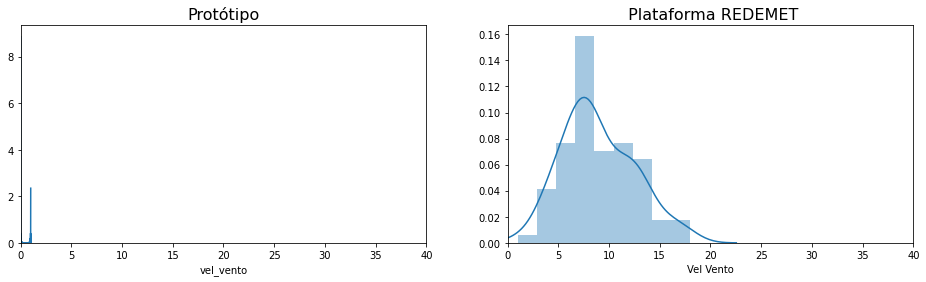

In [ ]:
f = plt.figure(figsize=(16, 4))
gs = f.add_gridspec(1, 2)


ax = f.add_subplot(gs[0, 0])
ax = sns.distplot(vel_vento['vel_vento'])
ax.set_title('Protótipo',fontsize = 16)
ax.axis(xmin=0,xmax=40)

ax1 = f.add_subplot(gs[0, 1])
ax1 = sns.distplot(vel_vento['Vel Vento'])
ax1.set_title(' Plataforma REDEMET',fontsize = 16)
ax1.axis(xmin=0,xmax=40)

f.savefig('dist_velvento.png')

## Box Plot Velocidade do Vento

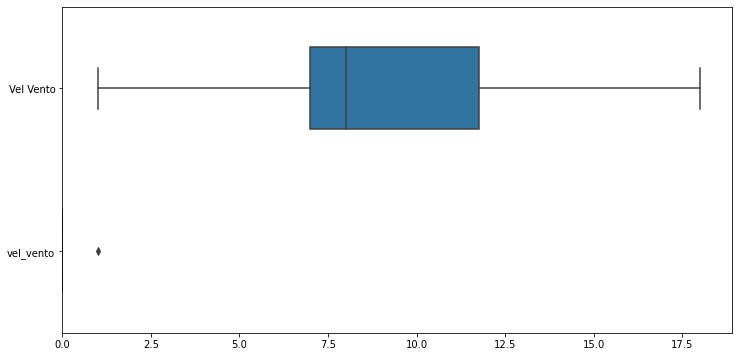

In [ ]:
ax = sns.boxplot(data = vel_vento[['Vel Vento','vel_vento']], orient = 'h',width=0.5)
ax.figure.set_size_inches(12,6)
ax.axis(xmin = 0)
ax.get_figure().savefig('box_plot_velvento.png')

## Estatísticas descritivas

In [ ]:
vel_vento.describe()

,vel_vento,Vel Vento
count,90.000000,90.000000
mean,0.011111,8.944444
std,0.105409,3.558061
min,0.000000,1.000000
25%,0.000000,7.000000
50%,0.000000,8.000000
75%,0.000000,11.750000
max,1.000000,18.000000


## Teste de Normalidade

In [ ]:
t,p_valor = normaltest(vel_vento['Vel Vento'])
print(T)
print(p_valor)

if(p_valor <= significancia):
    print('Não é Normal')
else:
    print('É Normal')

280.5
0.23345966528153922
É Normal


## Teste de Wilcoxon

In [ ]:
T,p_valor = wilcoxon(dir_vento['DV_Prototipo'],dir_vento['DV_REDEMET'])
print(T)
print(p_valor)

if(p_valor <= significancia):
  print('Rejeita H0')
else:
  print('Ajeita H0')

1222.0
0.0014044970753314561
Rejeita H0
